https://sage2.icse.us.edu.pl/home/pub/300/

In [1]:
%display latex

In [2]:
var('t') 
uv_wsp = [('phi',r'\varphi')] 
xy_wsp = [('x','x')] 
for v,lv in uv_wsp+xy_wsp:
    var("%s"%v,latex_name=r'%s'%lv) 
    vars()[v.capitalize()] = function(v.capitalize(),t)
    var("%sdd"%v,latex_name=r'\ddot %s'%lv) 
    var("%sd"%v,latex_name=r'\dot %s'%lv) 
    var("d%s"%v,latex_name=r'\delta %s'%lv) 
    uv = [vars()[v] for v,lv in uv_wsp] 
to_fun=dict() 
dico=to_fun
for v,lv in uv_wsp+xy_wsp: 
    to_fun[vars()[v]]=vars()[v.capitalize()] 
    to_fun[vars()[v+"d"]]=vars()[v.capitalize()].diff() 
    to_fun[vars()[v+"dd"]]=vars()[v.capitalize()].diff(2) 
to_var = dict((v,k) for k,v in to_fun.items()) 

/home/pi/sage/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: DeprecationWarning: Calling function('f',x) is deprecated. Use function('f')(x) instead.
See http://trac.sagemath.org/17447 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
to_var 

{diff(X(t), t, t): xdd,
 diff(Phi(t), t): phid,
 diff(X(t), t): xd,
 diff(Phi(t), t, t): phidd,
 Phi(t): phi,
 X(t): x}

In [4]:
var('omega0') 
assume(omega0>0) 
osc = xdd == -omega0^2*x 
osc.show() 
phi_anal = desolve(osc.subs(dico),
                              dvar=X,ivar=t,show_method=True) 
show(phi_anal) 
fi=phi_anal

xdd == -omega0^2*x

[_K2*cos(omega0*t) + _K1*sin(omega0*t), 'constcoeff']

In [5]:
var('v0 x0') 
phi_anal = desolve(osc.subs(to_fun),dvar=X,ivar=t,ics=[0,0,x0]) 
show(phi_anal)

x0*sin(omega0*t)/omega0

In [6]:
var('v0 x0') 
phi_anal= desolve(osc.subs(to_fun),dvar=X,ivar=t,ics=[0,v0,0]) 
show(phi_anal)

v0*cos(omega0*t)

In [7]:
phi_anal = desolve(osc.subs(to_fun),dvar=X,ivar=t,ics=[0,0,1]) 
show(phi_anal) 

sin(omega0*t)/omega0

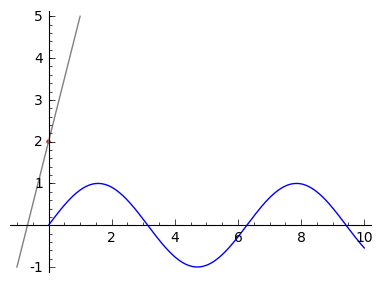

In [8]:
pp=plot(phi_anal.subs(omega0==1),(t,0,10),
     figsize=4)
q=plot( 3*t+2,(t,-1,1),color='gray')+point([0,2],color='red')
show(pp+q)

In [9]:
var('omega omega0') 
var('g', latex_name='\gamma') 
forget() 
assume(g-2*omega0<0) 
assume(g>0)
assume(omega0>0) 
show( assumptions() )
osc = xdd == -g*xd - omega0^2*x 
osc.show() 
phi_anal = desolve(osc.subs(to_fun),dvar=X,ivar=t) 

[g - 2*omega0 < 0, g > 0, omega0 > 0]

xdd == -omega0^2*x - g*xd

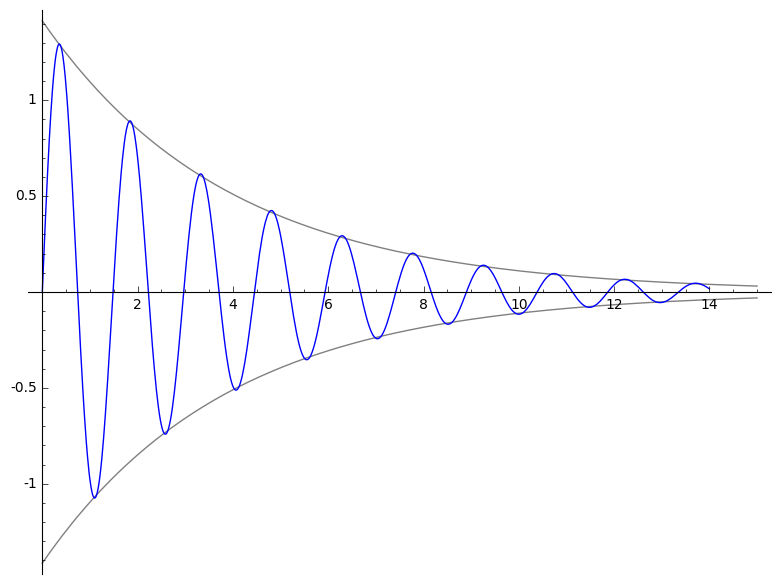

In [41]:
var("k1,k2,t") 
pars={k1:1,k2:1,omega0:1,g:.51} 
A = (k1*sin(x)+k2*cos(x)).subs(x==arctan(k2/k1)).subs(pars)
#d=plot( phi_anal.subs(pars), (t,0,15), figsize=(10,2))
x = var('x') 
y = function('y')(x) 
y_o = 0; y_oprime = 6; 
y_inhom = desolve(diff(y,x,2) + diff(y/2,x)+18*y, y,
                  ics=[0,y_o,y_oprime]);
a=plot(y_inhom,0,14) 
b= plot( (A*exp(-1/2*g*t)).substitute(pars),(t,0,15),color='gray' )
c=plot( (-A*exp(-1/2*g*t)).substitute(pars),
       (t,0,15),color='gray' )
show(b+c+a)

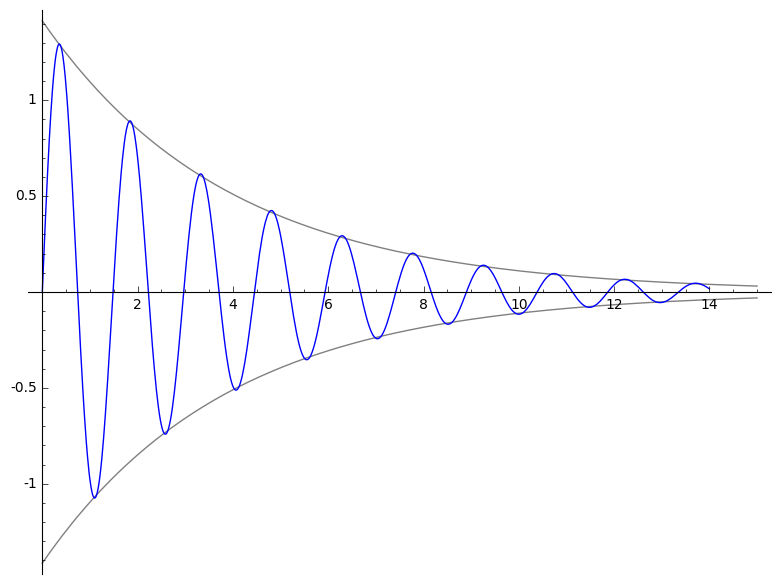

In [42]:
show(b+c+a)

In [12]:
var('t,C')
eqn=solve(9*(1-exp(-t/(1000*C)))==6,C);
eqn 

[C == 1/1000*t/log(3)]

In [13]:
eqn[0]

C == 1/1000*t/log(3)

In [14]:
Csol=eqn[0].rhs(); Csol 

1/1000*t/log(3)

In [15]:
Csolsubs=Csol.subs(t=5) ;Csolsubs 

1/200/log(3)

In [16]:
var('tau') ;tau=Csolsubs*1000; tau 

5/log(3)

In [17]:
N(tau) 

4.55119613313419

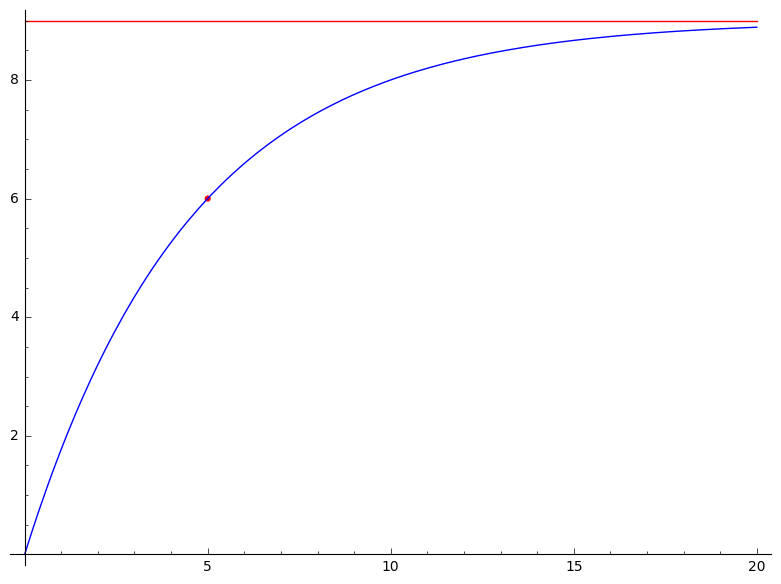

In [18]:
t = var('t') 
U = 9*(1-e^(-t/N(tau)))
p = plot(U,(0, 20))
p += point((5, 6), color='red', pointsize=20)
p += line([(0, 9), (20, 9)], color='red'); p 

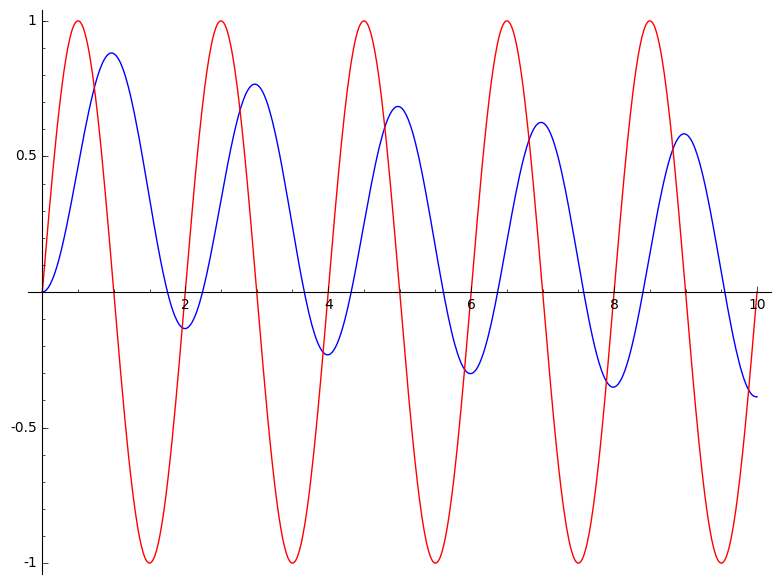

In [19]:
t = var('t')
x = function('x', t) 
DE = 6*diff(x, t) + x - 9*sin(0.5*2*pi*t) 
U = desolve(DE, x, [0,0]) 
p = plot(U, (0, 10))
p += plot(sin(pi*t), (0, 10), color='red'); p 

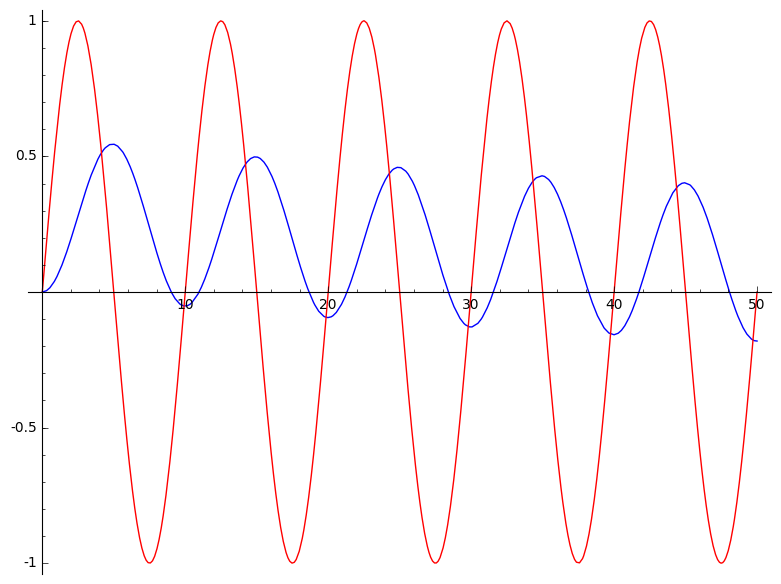

In [20]:
t=var('t')
x = function('x',t) 
DE2 = 50*diff(x, t) + x - 9*sin(0.1*2*pi*t) 
U2 = desolve(DE2, x, [0,0]) 
p2 = plot(U2, (0, 50)); 
p2 += plot(sin(0.1*2*pi*t), (0, 50), color='red'); p2 